In [1]:
import sys
import tensorflow.keras
import tensorflow as tf

print(f"tensorflow version : {tf.__version__}")
# print(f"keras version : {tensorflow.keras.__version__}")

gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is " , "Available" if gpu else "NOT available")

tensorflow version : 2.13.0
GPU is  Available


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from sklearn.metrics import precision_score
from tensorflow.keras import regularizers
import shutil
import glob
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Concatenate, AveragePooling2D, Flatten, Dense
from keras.layers import Conv2D , GlobalAveragePooling2D , MaxPooling2D,Dropout , Flatten , Dense, BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf
from tensorflow.keras.layers import GaussianNoise
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.framework.func_graph import flatten
from keras.callbacks import ModelCheckpoint , EarlyStopping , ReduceLROnPlateau
from tensorflow.keras.models import Model , load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import  InceptionV3
from tensorflow.keras.applications.inception_v3 import  preprocess_input
from sklearn.model_selection import KFold
from keras.callbacks import Callback

In [3]:
import os

root_dir = "data"
number_of_images = {}

for dir in os.listdir(root_dir):
    # Ignore .DS_Store files
    if dir == '.DS_Store':
        continue

    # Check if the item is a directory before listing its contents
    if os.path.isdir(os.path.join(root_dir, dir)):
        number_of_images[dir] = len(os.listdir(os.path.join(root_dir, dir)))

print(number_of_images.items())


dict_items([('cat', 5000), ('dog', 5000), ('truck', 5000), ('bird', 5000), ('airplane', 5000), ('ship', 5000), ('frog', 5000), ('horse', 5000), ('deer', 5000), ('automobile', 5000)])


In [4]:
def foldercreation (path , split) :
    if not os.path.exists('./'+path):
      os.mkdir('./'+path)

      for dir in os.listdir(root_dir):
        if dir == '.DS_Store':
           continue
            
        os.makedirs('./'+path+"/"+dir)

        for img in np.random.choice(a=os.listdir(os.path.join(root_dir,dir)) , size = (math.floor(split * number_of_images[dir])-5) , replace=False):
          Original = os.path.join(root_dir,dir,img)
          Destination =os.path.join('./'+path , dir)
          shutil.copy(Original,Destination)
          # os.remove(Original)

    else:
      print("The folder exsist")

In [5]:
foldercreation("train_data",0.7)
foldercreation("validation_data",0.15)
foldercreation("test_data",0.15)

The folder exsist
The folder exsist
The folder exsist


In [6]:
image_data = ImageDataGenerator (
                                     
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      preprocessing_function= preprocess_input,
                                )

image=image_data.flow_from_directory(directory="train_data" ,
                                       target_size=(28,28),
                                       batch_size=32,
                                       shuffle=True,
                                       class_mode="categorical")

Found 34950 images belonging to 10 classes.


In [7]:
def preprocessing2 (path):
  image_data = ImageDataGenerator(preprocessing_function= preprocess_input)
  image = image_data.flow_from_directory(directory = path,
                                         target_size=(28,28),
                                         batch_size = 32,
                                         shuffle=True,
                                         class_mode = "categorical")
  return image

In [8]:
path_test ="test_data"
test_data = preprocessing2(path_test)
X_test , Y_test = test_data.next()

Found 7450 images belonging to 10 classes.


In [9]:
path_validate="validation_data"
validate_data = preprocessing2(path_validate)
validate_data_1 , validate_labels = validate_data.next()

Found 7450 images belonging to 10 classes.


In [10]:

def swish(x):
    return x * tf.nn.sigmoid(x)

def model_layer_1 (inputs,filters):


  convo_2x2 = Conv2D(filters=filters[0], kernel_size=(2,2), padding='same', activation='swish')(inputs)
  convo_3x3 = Conv2D(filters=filters[1], kernel_size=(3,3), padding='same', activation='swish')(inputs)
  pool_conv = Conv2D(filters=filters[2], kernel_size=(3,3), padding='same', activation='swish')(inputs)


  outputs = Concatenate(axis=-1)([convo_2x2, convo_3x3, pool_conv])

  return outputs


def model_layer_2 (inputs,filters):



  convo_3x3 = Conv2D(filters=filters[0], kernel_size=(2,2), padding='same', activation='swish')(inputs)
  pool_3x3 =MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='same')(convo_3x3)

  convo_5x5 = Conv2D(filters=filters[1], kernel_size=(3,3), padding='same', activation='swish')(inputs)
  pool_5x5 = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(convo_5x5)

  outputs = Concatenate(axis=-1)([pool_3x3, pool_5x5])

  return outputs


def model_layer_3 (inputs,filters):
    
  convo_1x1 = Conv2D(filters=filters[0], kernel_size=(3,3), padding='same', activation='swish')(inputs)
  pool_1x1 = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(inputs)
  outputs = Concatenate(axis=-1)([pool_1x1, convo_1x1])

  return outputs


# def model_layer_5 (inputs,filters):
    
#   convo_1x1 = Conv2D(filters=filters[0], kernel_size=(5,5), padding='same', activation='relu')(inputs)
#   pool_1x1 = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(inputs)
#   outputs = Concatenate(axis=-1)([pool_1x1, convo_1x1])

#   return outputs

# def model_layer_6 (inputs):
    
#   pool_3x3 = MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='same')(inputs)
#   pool_1x1 = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(inputs)
#   outputs = Concatenate(axis=-1)([pool_1x1, pool_3x3])

#   return outputs

    




In [11]:
from keras.layers import Input
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout

# define input tensor

input_tensor = Input(shape=(28, 28, 3))



original_model = model_layer_3(input_tensor,[128])
original_model = MaxPooling2D(pool_size=(2,2) ,padding='same')(original_model)


original_model = model_layer_1(original_model,[32,64,128])
original_model = MaxPooling2D(pool_size=(2,2),padding='same')(original_model)
original_model = model_layer_2(original_model,[128,64])

original_model = MaxPooling2D(pool_size=(2,2) ,padding='same')(original_model)
original_model = model_layer_3(original_model,[128])




2023-12-20 12:40:18.126380: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-12-20 12:40:18.126418: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-20 12:40:18.126434: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-20 12:40:18.126488: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-20 12:40:18.126511: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:

original_model = Flatten()(original_model)

original_model = Dense(512, activation='swish' ,kernel_regularizer=regularizers.l2(0.001))(original_model)
original_model = Dense(256, activation='swish' ,kernel_regularizer=regularizers.l2(0.001))(original_model)
original_model = Dropout(0.5)(original_model)

output_tensor = Dense(10, activation='softmax' ,kernel_regularizer=regularizers.l2(0.001))(original_model)

original_model = Model(inputs=input_tensor, outputs=output_tensor)

In [13]:
original_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 3)]          0         []                            
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 28, 28, 3)            0         ['input_1[0][0]']             
 D)                                                                                               
                                                                                                  
 conv2d (Conv2D)             (None, 28, 28, 128)          3584      ['input_1[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 28, 28, 131)          0         ['max_pooling2d[0][0]',   

In [14]:
opt = keras.optimizers.Adam()
original_model.compile(optimizer= opt ,
              loss= keras.losses.categorical_crossentropy,
              metrics=['accuracy' , 'AUC'])

In [15]:
earlystop = EarlyStopping(monitor="accuracy",
                          min_delta=0.01 , patience=3,
                          verbose=1,
                          mode="auto")
modelcheckpoint = ModelCheckpoint(monitor="accuracy",
                                  filepath = "./swish.h5",
                                  verbose=1,
                                  save_best_only=True,
                                  mode ="auto"
                                  )
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-3)


class MetricsCallback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        x_val, y_val = self.validation_data[0], self.validation_data[1]
        predictions = self.model.predict(x_val)
        
        # Calculate top-5 accuracy
        top_5 = np.argsort(predictions, axis=1)[:, -5:]
        true_labels = np.argmax(y_val, axis=1)
        top_5_accuracy = np.mean([1 if true_label in pred_classes else 0 for true_label, pred_classes in zip(true_labels, top_5)])
        
        # Calculate precision
        precision = precision_score(true_labels, np.argmax(predictions, axis=1), average='weighted')
        
        print(f'Epoch {epoch + 1} - Top-5 Accuracy: {top_5_accuracy:.4f} - Precision: {precision:.4f}')


metrics_callback = MetricsCallback(validation_data=(validate_data_1, validate_labels))

callbs = [earlystop,modelcheckpoint,lr_scheduler,metrics_callback]

In [16]:
final = original_model.fit(
    image,
    steps_per_epoch=len(image),
    epochs=30,
    validation_data=(validate_data_1, validate_labels),
    validation_steps=len(validate_data_1),
    verbose=1,
    callbacks=callbs)
    

Epoch 1/30


2023-12-20 12:40:20.363184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1093/1093 [==============================] - ETA: 0s - loss: 1.8203 - accuracy: 0.4276 - auc: 0.8560

2023-12-20 12:41:55.594278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: accuracy improved from -inf to 0.42758, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 214ms/step
Epoch 1 - Top-5 Accuracy: 1.0000 - Precision: 0.6771
1093/1093 [==============================] - 98s 88ms/step - loss: 1.8203 - accuracy: 0.4276 - auc: 0.8560 - val_loss: 1.3261 - val_accuracy: 0.6562 - val_auc: 0.9290 - lr: 0.0010
Epoch 2/30


2023-12-20 12:41:57.788131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1093/1093 [==============================] - ETA: 0s - loss: 1.3437 - accuracy: 0.5824 - auc: 0.9205
Epoch 2: accuracy improved from 0.42758 to 0.58243, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 33ms/step
Epoch 2 - Top-5 Accuracy: 0.9688 - Precision: 0.7979
1093/1093 [==============================] - 90s 82ms/step - loss: 1.3437 - accuracy: 0.5824 - auc: 0.9205 - val_loss: 1.0632 - val_accuracy: 0.7500 - val_auc: 0.9565 - lr: 0.0010
Epoch 3/30
   1/1093 [..............................] - ETA: 1:43 - loss: 1.6247 - accuracy: 0.4688 - auc: 0.8835

/Users/likhit/venv-metal/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1093/1093 [==============================] - ETA: 0s - loss: 1.1998 - accuracy: 0.6447 - auc: 0.9408
Epoch 3: accuracy improved from 0.58243 to 0.64475, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 36ms/step
Epoch 3 - Top-5 Accuracy: 1.0000 - Precision: 0.8385
1093/1093 [==============================] - 90s 82ms/step - loss: 1.1998 - accuracy: 0.6447 - auc: 0.9408 - val_loss: 0.9667 - val_accuracy: 0.7812 - val_auc: 0.9671 - lr: 0.0010
Epoch 4/30
1093/1093 [==============================] - ETA: 0s - loss: 1.0864 - accuracy: 0.6863 - auc: 0.9525
Epoch 4: accuracy improved from 0.64475 to 0.68629, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 29ms/step
Epoch 4 - Top-5 Accuracy: 1.0000 - Precision: 0.7656
1093/1093 [==============================] - 91s 83ms/step - loss: 1.0864 - accuracy: 0.6863 - auc: 0.9525 - val_loss: 0.9396 - val_accuracy: 0.6875 - val_auc: 0.9671 - lr: 0.0010
Epoch 5/30
1093/1093 [==============================] - ETA: 0s - loss: 1.0139 - accuracy: 0.7122 - auc: 0.9594
Epoch 5: accuracy improved from 0.68629 to 0.71219, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 38ms/step
Epoch 5 - Top-5 Accuracy: 1.0000 - Precision: 0.8167
1093/1093 [==============================] - 91s 83ms/step - loss: 1.0139 - accuracy: 0.7122 - auc: 0.9594 - val_loss: 0.8672 - val_accuracy: 0.7500 - val_auc: 0.9754 - lr: 0.0010
Epoch 6/30
1093/1093 [==============================] - ETA: 0s - loss: 0.9502 - accuracy: 0.7348 - auc: 0.9648
Epoch 6: accuracy improved from 0.71219 to 0.73482, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 53ms/step
Epoch 6 - Top-5 Accuracy: 1.0000 - Precision: 0.8250
1093/1093 [==============================] - 89s 81ms/step - loss: 0.9502 - accuracy: 0.7348 - auc: 0.9648 - val_loss: 0.8865 - val_accuracy: 0.7500 - val_auc: 0.9718 - lr: 0.0010
Epoch 7/30
1093/1093 [==============================] - ETA: 0s - loss: 0.9044 - accuracy: 0.7498 - auc: 0.9683
Epoch 7: accuracy improved from 0.73482 to 0.74976, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 42ms/step
Epoch 7 - Top-5 Accuracy: 1.0000 - Precision: 0.8646
1093/1093 [==============================] - 100s 92ms/step - loss: 0.9044 - accuracy: 0.7498 - auc: 0.9683 - val_loss: 0.8409 - val_accuracy: 0.8125 - val_auc: 0.9737 - lr: 0.0010
Epoch 8/30


/Users/likhit/venv-metal/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1093/1093 [==============================] - ETA: 0s - loss: 0.8415 - accuracy: 0.7658 - auc: 0.9717
Epoch 8: accuracy improved from 0.74976 to 0.76578, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 44ms/step
Epoch 8 - Top-5 Accuracy: 0.9688 - Precision: 0.8375
1093/1093 [==============================] - 108s 99ms/step - loss: 0.8415 - accuracy: 0.7658 - auc: 0.9717 - val_loss: 0.8817 - val_accuracy: 0.7188 - val_auc: 0.9604 - lr: 0.0010
Epoch 9/30
1093/1093 [==============================] - ETA: 0s - loss: 0.8252 - accuracy: 0.7729 - auc: 0.9735
Epoch 9: accuracy improved from 0.76578 to 0.77293, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 123ms/step
Epoch 9 - Top-5 Accuracy: 1.0000 - Precision: 0.9062
1093/1093 [==============================] - 91s 83ms/step - loss: 0.8252 - accuracy: 0.7729 - auc: 0.9735 - val_loss: 0.6296 - val_accuracy: 0.8750 - val_auc: 0.9908 - lr: 0.0010
Epoch 10/30
1093/1093 [==============================] - ETA: 0s - loss: 0.8084 - accuracy: 0.7830 - auc: 0.9752
Epoch 10: accuracy improved from 0.77293 to 0.78300, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 39ms/step
Epoch 10 - Top-5 Accuracy: 1.0000 - Precision: 0.8385
1093/1093 [==============================] - 89s 81ms/step - loss: 0.8084 - accuracy: 0.7830 - auc: 0.9752 - val_loss: 0.6457 - val_accuracy: 0.8125 - val_auc: 0.9901 - lr: 0.0010
Epoch 11/30
1093/1093 [==============================] - ETA: 0s - loss: 0.8138 - accuracy: 0.7930 - auc: 0.9767
Epoch 11: accuracy improved from 0.78300 to 0.79296, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 31ms/step
Epoch 11 - Top-5 Accuracy: 1.0000 - Precision: 0.9427
1093/1093 [==============================] - 85s 78ms/step - loss: 0.8138 - accuracy: 0.7930 - auc: 0.9767 - val_loss: 0.6740 - val_accuracy: 0.9062 - val_auc: 0.9733 - lr: 0.0010
Epoch 12/30
1093/1093 [==============================] - ETA: 0s - loss: 0.7545 - accuracy: 0.8035 - auc: 0.9792
Epoch 12: accuracy improved from 0.79296 to 0.80355, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 26ms/step
Epoch 12 - Top-5 Accuracy: 0.9688 - Precision: 0.8500
1093/1093 [==============================] - 85s 77ms/step - loss: 0.7545 - accuracy: 0.8035 - auc: 0.9792 - val_loss: 0.6106 - val_accuracy: 0.8438 - val_auc: 0.9883 - lr: 0.0010
Epoch 13/30
   1/1093 [..............................] - ETA: 2:13 - loss: 0.7849 - accuracy: 0.7188 - auc: 0.9779

/Users/likhit/venv-metal/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1093/1093 [==============================] - ETA: 0s - loss: 0.7200 - accuracy: 0.8086 - auc: 0.9803
Epoch 13: accuracy improved from 0.80355 to 0.80856, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 30ms/step
Epoch 13 - Top-5 Accuracy: 1.0000 - Precision: 0.9062
1093/1093 [==============================] - 85s 78ms/step - loss: 0.7200 - accuracy: 0.8086 - auc: 0.9803 - val_loss: 0.5878 - val_accuracy: 0.8438 - val_auc: 0.9887 - lr: 0.0010
Epoch 14/30
1093/1093 [==============================] - ETA: 0s - loss: 0.7208 - accuracy: 0.8159 - auc: 0.9810
Epoch 14: accuracy improved from 0.80856 to 0.81588, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 56ms/step
Epoch 14 - Top-5 Accuracy: 1.0000 - Precision: 0.8594
1093/1093 [==============================] - 92s 84ms/step - loss: 0.7208 - accuracy: 0.8159 - auc: 0.9810 - val_loss: 0.7949 - val_accuracy: 0.7812 - val_auc: 0.9675 - lr: 0.0010
Epoch 15/30
1093/1093 [==============================] - ETA: 0s - loss: 0.7375 - accuracy: 0.8203 - auc: 0.9816
Epoch 15: accuracy improved from 0.81588 to 0.82031, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 33ms/step
Epoch 15 - Top-5 Accuracy: 1.0000 - Precision: 0.7839
1093/1093 [==============================] - 92s 84ms/step - loss: 0.7375 - accuracy: 0.8203 - auc: 0.9816 - val_loss: 0.7588 - val_accuracy: 0.7812 - val_auc: 0.9807 - lr: 0.0010
Epoch 16/30
1093/1093 [==============================] - ETA: 0s - loss: 0.6967 - accuracy: 0.8252 - auc: 0.9826
Epoch 16: accuracy improved from 0.82031 to 0.82518, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 32ms/step
Epoch 16 - Top-5 Accuracy: 1.0000 - Precision: 0.8812
1093/1093 [==============================] - 100s 91ms/step - loss: 0.6967 - accuracy: 0.8252 - auc: 0.9826 - val_loss: 0.7155 - val_accuracy: 0.8438 - val_auc: 0.9819 - lr: 0.0010
Epoch 17/30
1093/1093 [==============================] - ETA: 0s - loss: 0.6732 - accuracy: 0.8276 - auc: 0.9837
Epoch 17: accuracy improved from 0.82518 to 0.82755, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 53ms/step
Epoch 17 - Top-5 Accuracy: 1.0000 - Precision: 0.8708
1093/1093 [==============================] - 106s 97ms/step - loss: 0.6732 - accuracy: 0.8276 - auc: 0.9837 - val_loss: 0.5524 - val_accuracy: 0.8438 - val_auc: 0.9926 - lr: 0.0010
Epoch 18/30
1093/1093 [==============================] - ETA: 0s - loss: 0.6804 - accuracy: 0.8323 - auc: 0.9841
Epoch 18: accuracy improved from 0.82755 to 0.83233, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 30ms/step
Epoch 18 - Top-5 Accuracy: 1.0000 - Precision: 0.8917
1093/1093 [==============================] - 74s 68ms/step - loss: 0.6804 - accuracy: 0.8323 - auc: 0.9841 - val_loss: 0.6673 - val_accuracy: 0.8750 - val_auc: 0.9869 - lr: 0.0010
Epoch 19/30
1093/1093 [==============================] - ETA: 0s - loss: 0.6643 - accuracy: 0.8397 - auc: 0.9847
Epoch 19: accuracy improved from 0.83233 to 0.83966, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 32ms/step
Epoch 19 - Top-5 Accuracy: 1.0000 - Precision: 0.9229
1093/1093 [==============================] - 70s 64ms/step - loss: 0.6643 - accuracy: 0.8397 - auc: 0.9847 - val_loss: 0.6822 - val_accuracy: 0.9062 - val_auc: 0.9746 - lr: 0.0010
Epoch 20/30
1093/1093 [==============================] - ETA: 0s - loss: 0.6608 - accuracy: 0.8421 - auc: 0.9857
Epoch 20: accuracy improved from 0.83966 to 0.84209, saving model to ./swish.h5


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 37ms/step
Epoch 20 - Top-5 Accuracy: 1.0000 - Precision: 0.8385
1093/1093 [==============================] - 74s 68ms/step - loss: 0.6608 - accuracy: 0.8421 - auc: 0.9857 - val_loss: 0.7093 - val_accuracy: 0.7812 - val_auc: 0.9724 - lr: 0.0010
Epoch 21/30
1093/1093 [==============================] - ETA: 0s - loss: 0.6462 - accuracy: 0.8480 - auc: 0.9859
Epoch 21: accuracy improved from 0.84209 to 0.84804, saving model to ./swish.h5
1/1 [==============================] - 0s 20ms/step
Epoch 21 - Top-5 Accuracy: 1.0000 - Precision: 0.9368
1093/1093 [==============================] - 64s 58ms/step - loss: 0.6462 - accuracy: 0.8480 - auc: 0.9859 - val_loss: 0.5042 - val_accuracy: 0.9062 - val_auc: 0.9939 - lr: 0.0010
Epoch 22/30


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1093/1093 [==============================] - ETA: 0s - loss: 0.6396 - accuracy: 0.8494 - auc: 0.9867
Epoch 22: accuracy improved from 0.84804 to 0.84936, saving model to ./swish.h5
1/1 [==============================] - 0s 17ms/step
Epoch 22 - Top-5 Accuracy: 1.0000 - Precision: 0.8385
1093/1093 [==============================] - 62s 56ms/step - loss: 0.6396 - accuracy: 0.8494 - auc: 0.9867 - val_loss: 1.2101 - val_accuracy: 0.6875 - val_auc: 0.9547 - lr: 0.0010
Epoch 22: early stopping


/Users/likhit/venv-metal/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
image.class_indices

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [18]:
import numpy as np
from sklearn.metrics import precision_score

def calculate_metrics(true_labels, predictions):
    # Calculate top-5 accuracy
    top_5 = np.argsort(predictions, axis=1)[:, -5:]
    top_5_accuracy = np.mean([1 if true_label in pred_classes else 0 for true_label, pred_classes in zip(true_labels, top_5)])

    # Calculate precision
    precision = precision_score(true_labels, np.argmax(predictions, axis=1), average='weighted')

    return top_5_accuracy, precision
    

In [19]:
prediction = original_model.evaluate(X_test , Y_test,verbose=1)
print('Test loss:', prediction[0])
print('Test accuracy:', prediction[1])

predictions = original_model.predict(X_test)
top_5_accuracy, precision = calculate_metrics(np.argmax(Y_test, axis=1), predictions)

# Print metrics
print(f' Top-5 Accuracy: {top_5_accuracy:.4f}')
print(f'Precision: {precision:.4f}')

2023-12-20 13:12:27.707202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 539ms/step - loss: 1.0608 - accuracy: 0.6875 - auc: 0.9646
Test loss: 1.0607926845550537
Test accuracy: 0.6875
1/1 [==============================] - 0s 15ms/step
 Top-5 Accuracy: 0.9688
Precision: 0.7839


/Users/likhit/venv-metal/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


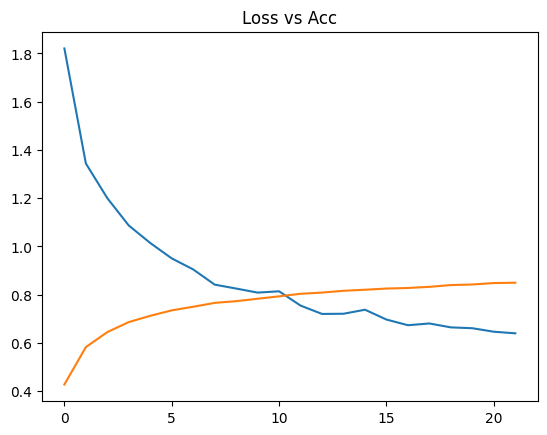

In [20]:
h = final.history
h.keys()



plt.plot(h['loss'])
plt.plot(h['accuracy'])

plt.title("Loss vs Acc")
plt.show()